In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.INFO)

In [2]:
# from tensorflow.examples.tutorials.mnist import input_data
# this command is not working on my computer, but take a try with it

In [3]:
import os 
from matplotlib import pyplot
import struct
import numpy as np

In [4]:
# this loads all of the data and processes it so that it can be used for the 
def mnist_loader():
    path = 'unzip_MNIST/'   # the training set is stored in this directory

    # Train data
    fname_train_images = os.path.join(path, 'train-images.idx3-ubyte')  # the training set image file path
    fname_train_labels = os.path.join(path, 'train-labels.idx1-ubyte')  # the training set label file path
    fname_test_images = os.path.join(path, 't10k-images.idx3-ubyte')  # the test set image file path
    fname_test_labels = os.path.join(path, 't10k-labels.idx1-ubyte')  # the test set label file path

    # open the label file and load it to the "train_labels"
    with open(fname_train_labels, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        train_labels = np.fromfile(flbl, dtype=np.uint8)

    # open the image file and load it to the "train_images"
    with open(fname_train_images, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
        
    # open the label file and load it to the "test_labels"
    with open(fname_test_labels, 'rb') as flbl_test:
        magic, num = struct.unpack(">II", flbl_test.read(8))
        test_labels = np.fromfile(flbl_test, dtype=np.uint8)

    # open the image file and load it to the "test_images"
    with open(fname_test_images, 'rb') as fimg_test:
        magic, num, rows, cols = struct.unpack(">IIII", fimg_test.read(16))
        test_images = np.fromfile(fimg_test, dtype=np.uint8).reshape(len(test_labels), rows, cols)
        
    return train_labels, train_images, test_labels, test_images

# this preprocesses a set of images/labels in preperation for the dataset to be used
def preprocessor(images, labels):
    
    # reshapes the vectors to the right size and then converts them to column vectors
    images = images.reshape((images.shape[0], images.shape[1] * images.shape[2]))
    images = images.T
    
    # normalizes answers by dividing by 255
    images = images / 255
    
    # processes the labels by student id so that it becomes a vector of 1's and 0's
    labels = labels.reshape(1, labels.shape[0])
    # labels = (labels == my_ID)
    # labels = labels.astype(np.int)
    
    return images, labels

# changes the size of the arrays to reflect the number of training examples
def example_shaper(images, labels, m):
    
    X = images[0:images.shape[0], 0:m]

    # I also process the train_actual_labels so that the dimensions match that of Z
    labels = labels[0:m]
    Y = labels.T
    
    return X, Y

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [5]:
# prepares training data
train_labels, train_images, test_labels, test_images = mnist_loader()
X_train, Y_train = preprocessor(train_images, train_labels)
X_test, Y_test = preprocessor(test_images, test_labels)

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train, 10)
Y_test = convert_to_one_hot(Y_test, 10)

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The label of the image is [0. 0. 1. ... 0. 0. 0.]


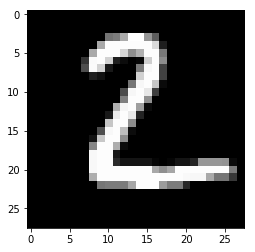

In [7]:
# displays a prediction on the test set for a visual representation
example_num = 1
print('The label of the image is', Y_test[1])  # print the label of the image displayed

pyplot.imshow(test_images[example_num], cmap='gray')  # plot the image in "gray" colormap
pyplot.show()

In [8]:
def create_placeholders(n_x, n_y):

    X = tf.placeholder(tf.float32, shape=(n_x, None), name="X")
    Y = tf.placeholder(tf.float32, shape=(n_y, None), name="Y")
    
    return X, Y

In [9]:
X, Y = create_placeholders(784, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(784, ?), dtype=float32)
Y = Tensor("Y:0", shape=(10, ?), dtype=float32)


In [10]:
def initialize_parameters():
        
    W1 = tf.get_variable("W1", [25,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [10,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [11]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = tf.add(tf.matmul(W1, X), b1) 
    A1 = tf.nn.relu(Z1)                   
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                                            
    
    return Z2

In [12]:
def compute_cost(Z2, Y):
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))   
    return cost

In [13]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, print_cost = True):

    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    

    # initialize all of the variables and set up the graph
    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z2 = forward_propagation(X, parameters)
    cost = compute_cost(Z2, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0
            _ , epoch_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [ ]:
parameters = model(X_train, Y_train, X_test, Y_test)